In [1]:
# -*- coding: utf-8 -*- 
# This code is written in Python 3.7. To install the required packages, run the following commands:
# pip install pandas numpy matplotlib seaborn scikit-learn sympy
# This code is applicable to the N_BaIoT dataset. 
# implemented Averaging Soft Voting tech. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import time

df = pd.read_csv('/home/ibibers@ads.iu.edu/IOT_Datasets/device7.csv')

# Drop duplicates
df = df.drop_duplicates(keep='first')

# Drop columns that have just one unique value
one_value = df.columns[df.nunique() == 1]
df = df.drop(columns = one_value, axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 115936 entries, 0 to 119999
Columns: 116 entries, MI_dir_L5_weight to label
dtypes: float64(115), int64(1)
memory usage: 103.5 MB


In [2]:

# Extract subsample of data
print (" Extract subsample of data: ")
print(df['label'].value_counts())

 Extract subsample of data: 
label
4    20000
3    20000
6    20000
1    19623
5    18157
2    18156
Name: count, dtype: int64


In [3]:
dropped_df = ['label']
X = df.drop(dropped_df, axis=1)
y = df['label']


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize models
start_time = time.time()
model1 = KNeighborsClassifier()
model2 = DecisionTreeClassifier()  
model3 = LogisticRegression(solver='lbfgs', multi_class='multinomial')  
model4 = RandomForestClassifier(n_estimators=200, random_state=42)

# Combine models using soft Voting Classifier
ensemble_model = VotingClassifier(estimators=[('knn', model1), ('dst', model2), ('lr', model3) , ('rf' , model4)], voting='soft')

# Train the ensemble model
start_train_time = time.time()
ensemble_model.fit(X_train, y_train)
train_time = time.time() - start_train_time

# Make predictions on new data (X_test)
start_pred_time = time.time()  
y_pred = ensemble_model.predict(X_test)
pred_time = time.time() - start_pred_time

total_time = time.time() - start_time



/home/ibibers@ads.iu.edu/micromamba/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print("Time taken for training:{:f} seconds".format(train_time))
print("Time taken for prediction: {:f} seconds".format(pred_time))
print("Total time taken:{:f} seconds".format(total_time))

Time taken for training:55.463457 seconds
Time taken for prediction: 4.584933 seconds
Total time taken:60.048835 seconds


Ensemble Model (Soft Voting) Accuracy: 0.999309968086024

Ensemble Model (Soft Voting) Classification Report (Rounded):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5892
           2       1.00      1.00      1.00      5481
           3       1.00      1.00      1.00      6147
           4       1.00      1.00      1.00      5966
           5       1.00      1.00      1.00      5433
           6       1.00      1.00      1.00      5862

    accuracy                           1.00     34781
   macro avg       1.00      1.00      1.00     34781
weighted avg       1.00      1.00      1.00     34781



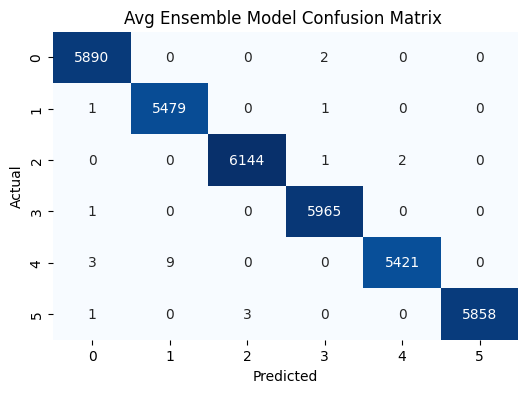

In [7]:
# Evaluate 
accuracy_final_rounded = accuracy_score(y_test, y_pred)
print("Ensemble Model (Soft Voting) Accuracy:", accuracy_final_rounded)

# Classification report
print("\nEnsemble Model (Soft Voting) Classification Report (Rounded):")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm_final_rounded = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_final_rounded, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Avg Ensemble Model Confusion Matrix ')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Ensemble Model (Soft Voting) Accuracy without adding the RF: 0.7049002937084557